## The following code is used for object identification and classifying the objects based on their types. 
In my case, the objects are images of cars and they are classified on the basis of the type of car. The algorithm used for the classification is Convulational Neural Network (CNN) and FaceNet. 

The contents for this code has been taught in the classes from the AI Institute.  

## Import modules.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Mount Google Drive to Google Colab Platform.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load the tables containing the information about the training and testing data set from the given path. 
The table consist columns named "Image_Name", "Box_x1", "Box_y1", "Box_x2", "Box_y2", "Car_Categories".  

In [0]:
path = "/content/drive/My Drive/ObjectID_Stanford_Dataset/"

training_data = pd.read_csv(path + "anno_train.csv", header = None)
training_data.columns = ['Image_Name','Box_x1','Box_y1','Box_x2','Box_y2','Car_Categories']
testing_data = pd.read_csv(path + "anno_test.csv", header = None)
testing_data.columns = ['Image_Name','Box_x1','Box_y1','Box_x2','Box_y2','Car_Categories']
print(training_data)
print(testing_data)

     Image_Name  Box_x1  Box_y1  Box_x2  Box_y2  Car_Categories
0     00001.jpg      39     116     569     375              14
1     00002.jpg      36     116     868     587               3
2     00003.jpg      85     109     601     381              91
3     00004.jpg     621     393    1484    1096             134
4     00005.jpg      14      36     133      99             106
...         ...     ...     ...     ...     ...             ...
8139  08140.jpg       3      44     423     336              78
8140  08141.jpg     138     150     706     523             196
8141  08142.jpg      26     246     660     449             163
8142  08143.jpg      78     526    1489     908             112
8143  08144.jpg      20     240     862     677              17

[8144 rows x 6 columns]
     Image_Name  Box_x1  Box_y1  Box_x2  Box_y2  Car_Categories
0     00001.jpg      30      52     246     147             181
1     00002.jpg     100      19     576     203             103
2     00003.jpg

# Selecting the required car types from the tables.

In [0]:
training_data = training_data.loc[training_data['Car_Categories'].isin(range(1,3))]
print(training_data)
testing_data = testing_data.loc[testing_data['Car_Categories'].isin(range(1,3))]
print(testing_data)

     Image_Name  Box_x1  Box_y1  Box_x2  Box_y2  Car_Categories
162   00163.jpg      46      84     661     428               1
461   00462.jpg       5       8      83      58               1
521   00522.jpg       6       7      94      68               1
669   00670.jpg      97      49     455     326               2
690   00691.jpg      84     189     573     376               2
...         ...     ...     ...     ...     ...             ...
7896  07897.jpg      18     141     603     367               2
7959  07960.jpg       2      24     288     129               2
7965  07966.jpg      79     469    1537    1198               1
8010  08011.jpg      10       6     250     110               1
8030  08031.jpg      12      16     117      71               1

[77 rows x 6 columns]
     Image_Name  Box_x1  Box_y1  Box_x2  Box_y2  Car_Categories
75    00076.jpg      11      13      84      60               1
182   00183.jpg      27      82     618     400               2
248   00249.jpg  

# Print the shape of the tables.

In [0]:
print(training_data.shape)
print(testing_data.shape)

(77, 6)
(76, 6)


# Load the labels of the different car types.

In [0]:
path = "/content/drive/My Drive/ObjectID_Stanford_Dataset/"
labels_without_years = pd.read_csv(path + "wo_year_names.csv", header=None, names=(['Car Names']))
print(labels_without_years.shape)
print(labels_without_years['Car Names'].head(25))

(196, 1)
0                   AM General Hummer SUV
1                          Acura RL Sedan
2                          Acura TL Sedan
3                         Acura TL Type-S
4                         Acura TSX Sedan
5                    Acura Integra Type R
6                     Acura ZDX Hatchback
7     Aston Martin V8 Vantage Convertible
8           Aston Martin V8 Vantage Coupe
9         Aston Martin Virage Convertible
10              Aston Martin Virage Coupe
11                  Audi RS 4 Convertible
12                          Audi A5 Coupe
13                         Audi TTS Coupe
14                          Audi R8 Coupe
15                          Audi V8 Sedan
16                         Audi 100 Sedan
17                         Audi 100 Wagon
18                      Audi TT Hatchback
19                          Audi S6 Sedan
20                    Audi S5 Convertible
21                          Audi S5 Coupe
22                        Audi S4 Sedan 1
23                       

# Converting the tables to numpy array.

In [0]:
training_data = np.array(training_data)
testing_data = np.array(testing_data)
print(training_data.shape)
print(testing_data.shape)

(77, 6)
(76, 6)


# Renaming the list of required labels as CATEGORIES.

In [0]:
CATEGORIES = np.array([labels_without_years['Car Names'][i] for i in range(0,2)])
print(CATEGORIES)

['AM General Hummer SUV' 'Acura RL Sedan']


# Loading the train and test images into array based on the labels in CATEGORIES.

Reshaping the images having standard 160 x 160 pixels.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/"

#CATEGORIES = labels_without_years['Car Names']
CATEGORIES = np.array([labels_without_years['Car Names'][i] for i in range(0,2)])
print(CATEGORIES.shape)

image_list = []
IMG_SIZE = 160
i = 0
j_tt = 0    
for category in CATEGORIES:  # do dogs and cats
    print(category)
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    i = i+1
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        j_tt = j_tt+1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        new_array = new_array.reshape(1,IMG_SIZE*IMG_SIZE)
        new_array1 = np.zeros(2+IMG_SIZE*IMG_SIZE)
        new_array1[0] = int(img[0:-4])
        new_array1[1] = i
        new_array1[2:] = new_array[0]
        image_list.append(new_array1)     
        ##plt.imshow(img_array, cmap='gray')  # graph it
        ##plt.show()  # display!
        ##break  # we just want one for now so break
 # break  #...and one more!
    
#new_array = new_array.reshape(1,IMG_SIZE*IMG_SIZE)
#print(new_array)  

(2,)
AM General Hummer SUV
Acura RL Sedan


# Making a new array of images of test and train data. 

In [0]:
image_list_train = image_list[0:j_tn]
image_list_test = image_list1[0:j_tt]

# Sorting the image list based on the number on the name of the images.

In [0]:
print(image_list_test[0][0:])    

plt.imshow(image_list_test[0][2:].reshape(IMG_SIZE,IMG_SIZE), cmap='gray')
plt.show()

image_list_test_sort = np.array(sorted(image_list_test, key=lambda x: x[0]))
print(image_list_test_sort[0][0:]) 

print(image_list_test_sort.shape[0])
print(image_list_test_sort[0:5])

labels_without_years['Car Names'][0]

NameError: ignored

# Plotting some images in the sorted list. 

75
0 55 Acura RL Sedan
1 33 AM General Hummer SUV
2 57 Acura RL Sedan
3 33 AM General Hummer SUV
4 46 AM General Hummer SUV
5 28 Acura RL Sedan
6 48 AM General Hummer SUV
7 52 Acura RL Sedan
8 3 Acura RL Sedan
9 33 AM General Hummer SUV
10 68 AM General Hummer SUV
11 69 Acura RL Sedan
12 53 Acura RL Sedan
13 57 Acura RL Sedan
14 19 AM General Hummer SUV
15 64 Acura RL Sedan
16 29 AM General Hummer SUV
17 65 Acura RL Sedan
18 31 AM General Hummer SUV
19 52 Acura RL Sedan
20 48 AM General Hummer SUV
21 68 AM General Hummer SUV
22 54 AM General Hummer SUV
23 35 AM General Hummer SUV
24 53 Acura RL Sedan


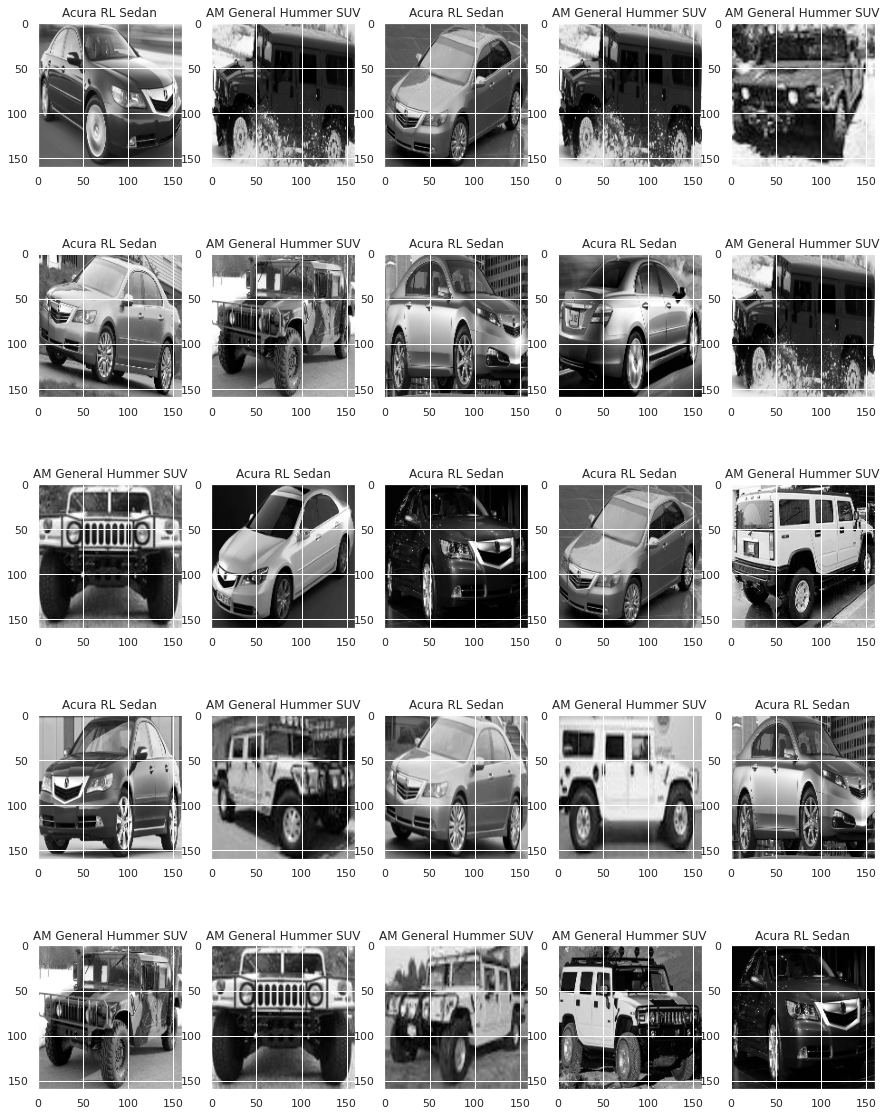

In [0]:
import random
W_grid = 5
L_grid = 5

x = np.array(labels_without_years['Car Names'])
fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,20))
axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array 
#number_training = len(image_list_train_sort) # get the length of the training dataset
number_training = image_list_test_sort.shape[0]-1 # get the length of the training dataset
print(number_training)
# Select a random number from 0 to n_training
for i in range(W_grid * L_grid):  
    # Select a random number
    num = random.randint(0,number_training)
    print(i,num,x[testing_data[num,5]-1])
    # read and display an image with the selected index to display apply methods for each figure axes[i]  
    axes[i].set_title(x[testing_data[num,5]-1]) 
    axes[i].imshow(image_list_test_sort[num,2:].reshape(IMG_SIZE,IMG_SIZE),cmap = 'gray')
    
plt.subplots_adjust(hspace=0.4)

# Making a new array and its shape for train and test set.

In [0]:
input_train = image_list_train_sort[:,2:]/255
output_train = image_list_train_sort[:,1]

input_test = image_list_test_sort[:,2:]/255
output_test= image_list_test_sort[:,1]

print(input_train.shape)

print(output_train.shape)

print(input_test.shape)
print(output_test.shape)

#print(input_train)
#print(output_train)
#print(output_test)

(77, 25600)
(77,)
(76, 25600)
(76,)


# Splitting the training images into train and validation set. Relabeling the testing images.

Printing the shape of these sets of images.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()

x_train, x_val, y_train, y_val = train_test_split(input_train, output_train, test_size= 0.2, stratify = output_train, random_state= 123)

x_test=input_test
y_test=output_test

print(x_train.shape)
print(y_train.T)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)

(61, 25600)
[1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1.
 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1.
 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2.]
(16, 25600)
(16,)
(76, 25600)


# Reshaping the train, validation and test images into 2D array.

Each entry in the matrix is the pixels assosciated to the image at that space point.

In [0]:
x_train=x_train.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,1)
x_test=x_test.reshape(x_test.shape[0],IMG_SIZE,IMG_SIZE,1)
x_val=x_val.reshape(x_val.shape[0],IMG_SIZE,IMG_SIZE,1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(61, 160, 160, 1)
(16, 160, 160, 1)
(76, 160, 160, 1)


# Importing keras libraries for employing machine learning algorithms.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# The model for Convolutional Neural Network (CNN) to train the machine to identify images.

In [0]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=5, padding = 'same' ,activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
cnn_model.add(Conv2D(64, kernel_size=3, padding = 'same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(6, activation='sigmoid'))


198


#Model Summary.

In [0]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1280032   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

# The type of loss function, optimizer and metric used in the neural network.

In [0]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['mse', 'accuracy']

# Compiling the model.

The epochs and batch-size used in the model.

In [0]:
# We can train with more epochs for better fit. It will demand more time
epochs = 20
batch_size = 32

cnn_model.compile(loss=loss, optimizer=optimizer,metrics = metrics)
history = cnn_model.fit(x_train,y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_val,y_val))

NameError: ignored

# Plotting the Accuracy, Validation Accuracy and Loss function.

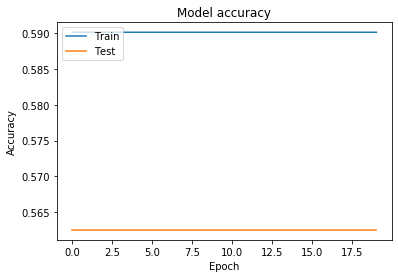

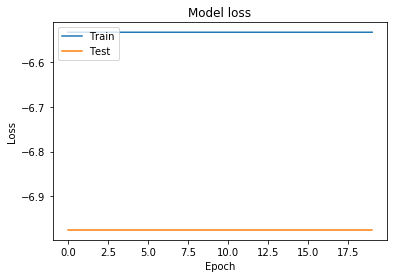

In [0]:
#from tensorflow.keras.utils import plot_model
#plot_model(model)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluating the trained CNN model on the testing images. 

In [0]:
input_test = input_test.reshape(input_test.shape[0], IMG_SIZE,IMG_SIZE,1)
evaluation = model.evaluate(input_test, y_test_OHE)
print(f'Test Accuracy : {evaluation[1]}')

76/76 [==============================] - 0s 3ms/step
Test Accuracy : 0.9078947399791918


# Predicting Classes of the input test images.

In [0]:
predicted_classes = model.predict_classes(input_test)

predicted_classes = predicted_classes+1

# Plotting the images of predicted classes of cars from the model with their true classes. 

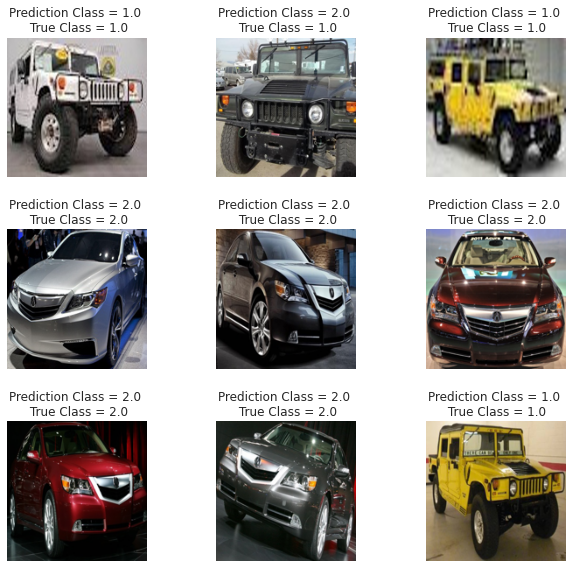

In [0]:
L = 3
W = 3
number_test = len(image_list_test_sort)-1 # get the length of the training dataset
list1 = [39, 16, 43, 57, 60, 52, 66, 58, 32]

fig, axes = plt.subplots(L, W, figsize = (10,10))
axes = axes.ravel() # 

for i in np.arange(0, L * W): 
    num = list1[i]
    #axes[i].imshow(input_test[num].reshape(IMG_SIZE,IMG_SIZE), cmap = 'gray')
    axes[i].imshow(valX[num])
    #axes[i].set_title(f"Prediction Class = {predicted_classes[num]:0.1f} \n True Class = {output_test[num]:0.1f}")
    axes[i].set_title(f"Prediction Class = {yhat_val[num]:0.1f} \n True Class = {valy[num][0]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
sns.set(font_scale=1.0)
plt.savefig('Fig_Predicted_FaceNet_Cars_Classes_2.jpeg')

# Plotting Confusion Matrix of the outputs from model for testing data.

[1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1.
 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 1.
 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1.
 2. 1. 1. 1.]


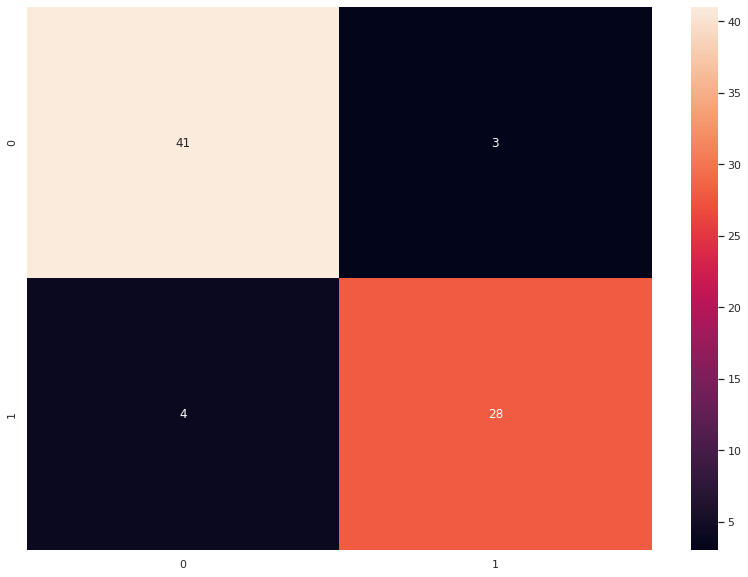

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(output_test, predicted_classes)
print(output_test)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
sns.set(font_scale=1.0)

# Evaluating Classification Report of the outputs from model for testing data.

In [0]:
from sklearn.metrics import classification_report

num_classes = 2
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(output_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93        44
     Class 1       0.93      0.88      0.90        32

    accuracy                           0.92        76
   macro avg       0.92      0.91      0.92        76
weighted avg       0.92      0.92      0.92        76



# Converting the training, testing and validation labels into One Hot Encoder (OHE).

In [0]:
y_train_OHE = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
print(y_train_OHE)
y_test_OHE = ohe.transform(y_test.reshape(-1,1)).toarray()
y_val_OHE = ohe.transform(y_val.reshape(-1,1)).toarray()

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


# The model for Convolutional Neural Network (CNN) to train the machine to identify images in OHE.

In [0]:
# 6) Train the model: make the architecture of the model
np.random.seed(1)
model=Sequential()
model.add(Conv2D(32, kernel_size=3,padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 160, 160, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 40, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

# Compiling the model for OHE.

The type of loss function, optimizer and metric used in the neural network.

In [0]:
opt = Adam(lr=0.001)
metrics = 'accuracy'

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train_OHE, nb_epoch=30, batch_size=50, validation_data=(x_val,y_val_OHE))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """



Train on 61 samples, validate on 16 samples
Epoch 1/30
61/61 [==============================] - 3s 55ms/step - loss: 1.3097 - acc: 0.4426 - val_loss: 1.5955 - val_acc: 0.5625
Epoch 2/30
61/61 [==============================] - 1s 16ms/step - loss: 2.0628 - acc: 0.5410 - val_loss: 0.9623 - val_acc: 0.4375
Epoch 3/30
61/61 [==============================] - 1s 15ms/step - loss: 1.3387 - acc: 0.4098 - val_loss: 0.6672 - val_acc: 0.6250
Epoch 4/30
61/61 [==============================] - 1s 15ms/step - loss: 0.6235 - acc: 0.6393 - val_loss: 0.7164 - val_acc: 0.5625
Epoch 5/30
61/61 [==============================] - 1s 16ms/step - loss: 0.6986 - acc: 0.5902 - val_loss: 0.6771 - val_acc: 0.5625
Epoch 6/30
61/61 [==============================] - 1s 15ms/step - loss: 0.6167 - acc: 0.6066 - val_loss: 0.6633 - val_acc: 0.6250
Epoch 7/30
61/61 [==============================] - 1s 15ms/step - loss: 0.5561 - acc: 0.7541 - val_loss: 0.6583 - val_acc: 0.6250
Epoch 8/30
61/61 [====================

# Evaluating the trained CNN model on the testing images where labels are of the form of OHE. 

In [0]:
model.evaluate(x_test,y_test_OHE)

76/76 [==============================] - 0s 3ms/step


[0.21463631328783536, 0.9078947399791918]

# Plotting the Accuracy, Validation Accuracy and Loss function.

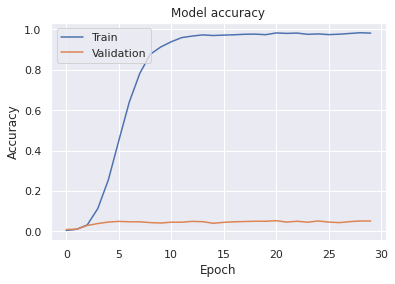

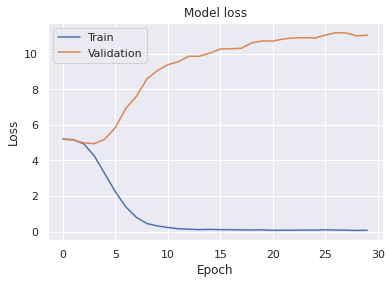

In [0]:
#from tensorflow.keras.utils import plot_model
#plot_model(model)

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#fig.savefig('Plot_Accuracy_Classes_2.jpeg')
# Plot training & validation loss values
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#fig.savefig('Plot_Loss_Classes_2.jpeg')

# Importing the libraries and uploading google drive in google colab platforms. 

In [0]:
# Transfer learning using Facenet

import matplotlib.pyplot as plt
import cv2

from google.colab import drive
drive.mount('/content/drive/')
relevant_path =  '/content/drive/My Drive/Data/'  #put the path to your folder here.

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Downloading some relevant files for employing FaceNet algorithm.

In [0]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P  relative_path #.... put your path here
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P  relative_path #.... put your path here

--2020-03-26 21:04:57--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘relative_path/haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.05s   

2020-03-26 21:04:57 (6.29 MB/s) - ‘relative_path/haarcascade_eye.xml’ saved [341406/341406]

--2020-03-26 21:04:58--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP

In [0]:
!wget https://github.com/opencv/opencv/blob/master/data/lbpcascades/lbpcascade_frontalface.xml -P relative_path

--2020-03-26 21:05:07--  https://github.com/opencv/opencv/blob/master/data/lbpcascades/lbpcascade_frontalface.xml
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘relative_path/lbpcascade_frontalface.xml’

lbpcascade_frontalf     [ <=>                ] 446.87K  --.-KB/s    in 0.06s   

2020-03-26 21:05:08 (6.85 MB/s) - ‘relative_path/lbpcascade_frontalface.xml’ saved [457591]



In [0]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1' -O facenet_keras.h5
from keras.models import load_model
model = load_model('facenet_keras.h5')
!sudo pip install mtcnn

print(model.inputs)
print(model.outputs)

--2020-03-26 21:05:12--  https://docs.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1
Resolving docs.google.com (docs.google.com)... 172.217.203.100, 172.217.203.139, 172.217.203.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/evr9qti0lchrublq51qmj6nqve0lpgb8/1585256700000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download [following]
--2020-03-26 21:05:17--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/evr9qti0lchrublq51qmj6nqve0lpgb8/1585256700000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-04-4s-docs.googleusercontent.com (doc-04

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


     |████████████████████████████████| 2.3MB 2.8MB/s 
[<tf.Tensor 'input_1:0' shape=(?, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Merge:0' shape=(?, 128) dtype=float32>]


# Summary of the model used in FaceNet algorithm.

In [0]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

# Loading of image dataset from the directory.

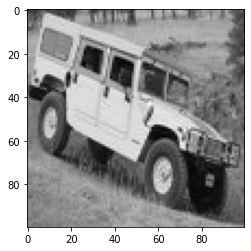

/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/smart fortwo Convertible


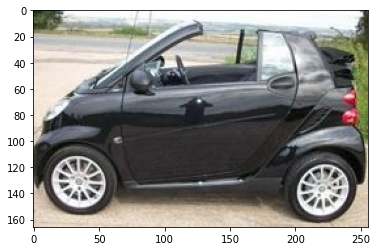

In [0]:
#install PIL library (named pillow), convert to RGB and plot
from PIL import Image
from numpy import asarray

CATEGORIES = np.array([labels_without_years['Car Names'][i] for i in [0,1]])

plt.imshow(image_list[0][2:].reshape(IMG_SIZE,IMG_SIZE), cmap='gray')
plt.show()

DATADIR = "/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/"
path = os.path.join(DATADIR,category)
print(path)
i = 0

for img in os.listdir(path):  # iterate over each image per dogs and cats
        #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        filename = os.path.join(path,img)
        image = Image.open(filename)
        image = image.convert('RGB')
        pixels = asarray(image)
        #print(pixels)
        plt.imshow(image)
        i = i+1
        if(i==3):
          break  # we just want one for now so break
 # break  #...and one more!

#filename = path + 'Murphy.jpg'
#image = Image.open(filename)
#image = img_array
#image = image.convert('RGB')
#pixels = asarray(image)

# This function converts into "RGB" format and resizes it to 160 x 160 pixel sizes.  

In [0]:
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt

def extract_face(filename, required_size=(160, 160)):
		# add here steps 2.3-2.4
		image = Image.open(filename)
		image = image.convert('RGB')
		image = image.resize(required_size)
		face_array = asarray(image)
		return face_array

# This function makes an array of all the extracted images from the "extract_face" function.

In [0]:
import numpy as np

def load_faces(directory):
    faces = list()
    for img in listdir(directory):
        image = directory + img
        print(image)
        face = extract_face(image)
        faces.append(face)
    return(np.array(faces))    

# Passing the path to the images to the function "load_faces".

Extending the array to consist all the images and labels.

In [0]:
import os
from os.path import isdir
from numpy import asarray

def load_dataset(directory, categories):
  X, y = list(), list()
  i=1
	# enumerate folders, on per class
  for category in categories:  # do dogs and cats
    print(category)
    path = os.path.join(directory,category)  # create path to dogs and cats
    #print(path)
    #for subdir in listdir(path):  #**/train/
      # path
    path_last = path  + '/'
    print(path_last)
      # skip any files that might be in the dir
      #if not isdir(path_last):
      #  continue
      # load all faces in the subdirectory
    faces = load_faces(path_last)
      # create labels
    labels = [i for _ in range(len(faces))]
      # summarize progress
    print('>loaded %d examples for class: %s' % (len(faces), i))
      # store
    X.extend(faces)
    y.extend(labels)	
    i=i+1
  return asarray(X), asarray(y)

# Loading the training and validation(testing) image data sets.

Converting theses data sets into numpy array. 

In [0]:
DATADIR = "/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/"
CATEGORIES = np.array([labels_without_years['Car Names'][i] for i in range(0,2)])
print(DATADIR)
print(CATEGORIES)

path1 = DATADIR
trainX, trainy = load_dataset(path1, CATEGORIES)
trainX = np.array(trainX)
trainy = np.array(trainy).reshape(len(trainy),1)
print(trainX.shape)
print(trainy.shape)

DATADIR = "/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/test/"
path2 = DATADIR
valX, valy = load_dataset(path2, CATEGORIES)
valX = np.array(valX)
valy = np.array(valy).reshape(len(valy),1)
print(valX.shape)
print(valy.shape)

/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/
['AM General Hummer SUV' 'Acura RL Sedan']
AM General Hummer SUV
/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/AM General Hummer SUV/
/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/AM General Hummer SUV/00773.jpg
/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/AM General Hummer SUV/00946.jpg
/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/AM General Hummer SUV/00707.jpg
/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/AM General Hummer SUV/00887.jpg
/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/AM General Hummer SUV/00462.jpg
/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/AM General Hummer SUV/00163.jpg
/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/AM General Hummer SUV/00522.jpg
/content/drive/My Drive/ObjectID_Stanford_Dataset/car_data/train/AM General Hummer SUV/01277.jpg
/cont

# This function uses the FaceNet model. 

yhat is the predicted value from the model on feeding the samples.  

In [0]:
from numpy import expand_dims

def get_features(model, face_pixels):
  #return vector of features for face_pixels image
  face_pixels = face_pixels.astype('float32')
  mean,std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels-mean)/std
  samples = expand_dims(face_pixels, axis=0)
  yhat = model.predict(samples)
  return yhat[0]

# newTrainX and newTestX stores the relevant features from the training and testing set using the function named "get_features". 

In [0]:
newTrainX = list()
#newTrainX and newTestX are lists of features, check their size and save them.
print(trainX.shape)
for face_pixels in trainX:
  features = get_features(model, face_pixels)
  newTrainX.append(features)
  
newTrainX = asarray(newTrainX)
print(newTrainX.shape)

newTestX = list()
print(valX.shape)
for face_pixels in valX:
  features = get_features(model, face_pixels)
  newTestX.append(features)
  
newTestX = asarray(newTestX)
print(newTestX.shape)

(77, 160, 160, 3)
(77, 128)
(76, 160, 160, 3)
(76, 128)


# Evaluates the accuracy score using SVC model and the newTrainX and newTestX created in the above cell.  

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model_svc = SVC(kernel='linear')
model_svc.fit(newTrainX, trainy)

yhat_train = model_svc.predict(newTrainX)
yhat_val = model_svc.predict(newTestX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_val = accuracy_score(valy, yhat_val)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_val*100))

print("-------"*5)

Accuracy: train=100.000, test=98.684
-----------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Plots the confusion matrix of the results obtained from FaceNet and SVC model.

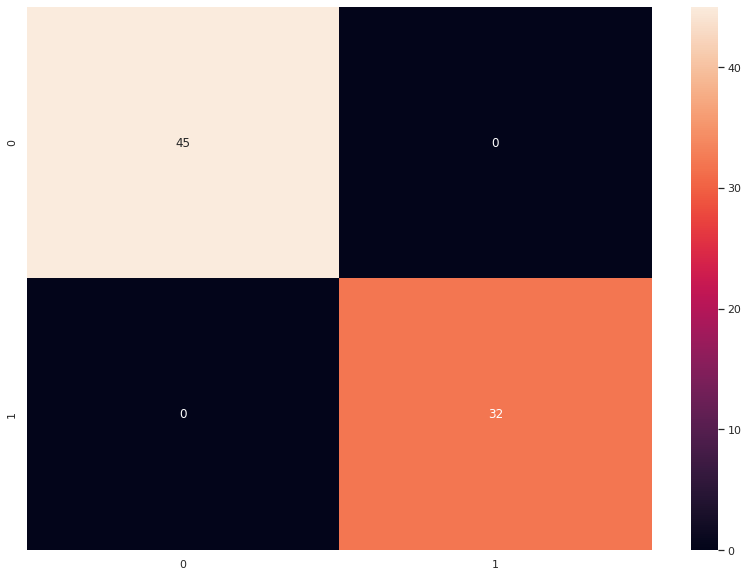

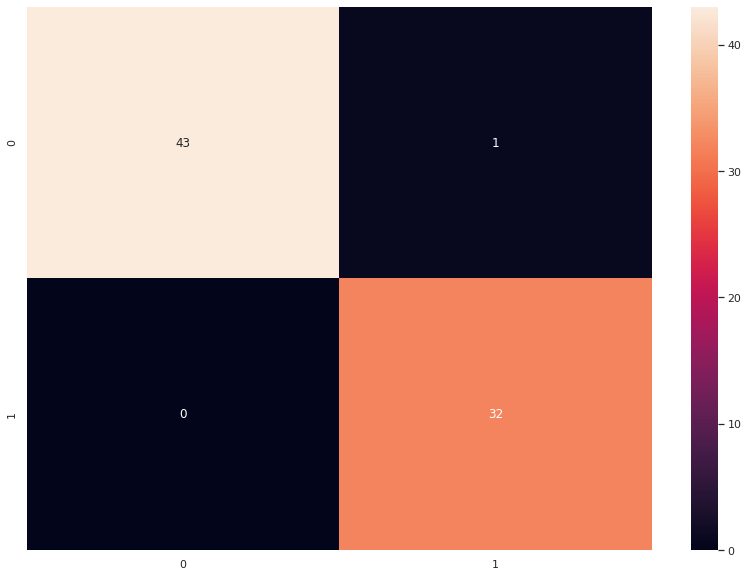

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_train = confusion_matrix(trainy, yhat_train)
cm_test = confusion_matrix(valy, yhat_val)

plt.figure(figsize = (14,10))
sns.heatmap(cm_train, annot=True)

plt.figure(figsize = (14,10))
sns.heatmap(cm_test, annot=True)
sns.set(font_scale=3.8)
plt.savefig('Confusion_Matrix_FaceNet_Classes_2.jpeg')

# The Accuracy Score (%) obtained from FaceNet model for different number of classes.

In [0]:
accuracy_facenet = [[2, 98.64], [4, 62.11], [6, 51.84], [8, 44.38], [10, 40.70], [20, 29.48], [40, 20.18], [60, 17.74], [80, 15.05], [100, 14.97], [120, 14.68], [140, 13.44],[160, 13.50], [180, 12.72], [196, 11.91]]
accuracy_facenet

[[2, 98.64],
 [4, 62.11],
 [6, 51.84],
 [8, 44.38],
 [10, 40.7],
 [20, 29.48],
 [40, 20.18],
 [60, 17.74],
 [80, 15.05],
 [100, 14.97],
 [120, 14.68],
 [140, 13.44],
 [160, 13.5],
 [180, 12.72],
 [196, 11.91]]

# The Accuracy Score (%) obtained from Convulational Neural Network (CNN) model for different number of classes.

In [0]:
accuracy_cnn = [[2,92.10],[4,40.99], [6,37.14], [8,31.00], [10,27.79], [20,20.39], [40,12.53], [60,9.69], [80,5.86] ,[100, 7.14], [120, 6.67], [140, 6.56], [160, 5.42], [180, 5.25], [196, 5.28]]
accuracy_cnn

[[2, 92.1],
 [4, 40.99],
 [6, 37.14],
 [8, 31.0],
 [10, 27.79],
 [20, 20.39],
 [40, 12.53],
 [60, 9.69],
 [80, 5.86],
 [100, 7.14],
 [120, 6.67],
 [140, 6.56],
 [160, 5.42],
 [180, 5.25],
 [196, 5.28]]

# The Accuracy Score (%) obtained from ResNet model for different number of classes.

This model isn't explained in this notebook.

In [0]:
accuracy_resnet = [[2,90.79],[4,85.09],[6,82.45], [8,83.28], [10,77.42], [20,73.59], [40,77.84], [60,81.15], [80,80.73], [100,81.78], [120,83.96], [140,83.24], [160,84.18], [180,84.16] , [196,84.85]]
accuracy_resnet

[[2, 90.79],
 [4, 85.09],
 [6, 82.45],
 [8, 83.28],
 [10, 77.42],
 [20, 73.59],
 [40, 77.84],
 [60, 81.15],
 [80, 80.73],
 [100, 81.78],
 [120, 83.96],
 [140, 83.24],
 [160, 84.18],
 [180, 84.16],
 [196, 84.85]]

# Creating a table for the number of classes of cars used as input in the model and the Accuracy Score.

In [0]:
num_class = [2, 4, 6, 8, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
acc_cnn = []
acc_facenet = []
acc_resnet = []

for i in range(0,len(num_class)):
  acc_cnn.append(accuracy_cnn[i][1]/100)
  acc_facenet.append(accuracy_facenet[i][1]/100)
  acc_resnet.append(accuracy_resnet[i][1]/100)

# Plotting the Accuracy Score vs Number of Classes for three different models used in the analysis.

The Convulational Neural Network (CNN), FaceNet and ResNet are the three different models. ResNet's performance outperforms the other two models when it comes to training the machine for identifying images belonging to large number of classes.

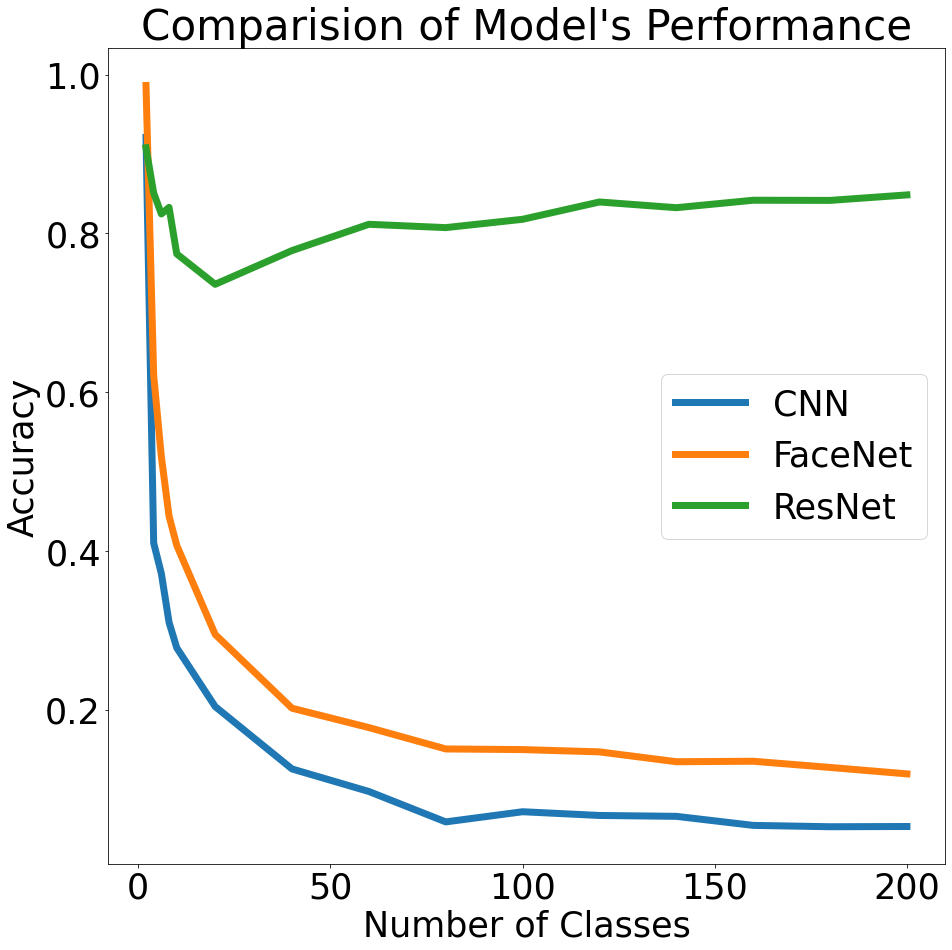

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
fig = plt.figure(figsize=(15,15))
plt.plot(num_class,acc_cnn,linewidth=7.0)
plt.plot(num_class,acc_facenet,linewidth=7.0)
plt.plot(num_class,acc_resnet,linewidth=7.0)
plt.title("Comparision of Model's Performance")
plt.ylabel('Accuracy')
plt.xlabel('Number of Classes')
plt.grid(False)
plt.legend(['CNN', 'FaceNet','ResNet'])
plt.rcParams.update({'font.size': 35})
plt.show()

fig.savefig('Plot_Comparision_Model_Performance_Classes.jpeg')